# The Diffraction Limit of a Telescope

The resolution of a telescope is limited by diffraction. Light from a distant source can be treated as coming effectively from infinity. When light of a certain wavelength $\lambda$ passes through a circular aperture of a telescope, it produces a circular diffraction pattern given by the equation

$I(r) = \big(\frac{J_1(r)}{kr}\big)^2$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=\frac{2\pi}{\lambda}$, and $J_1(x)$ is a Bessel function of order 1. In general the Bessel functions $J_m(x)$ are given by

$J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x\sin\theta)d\theta$

where $m$ is a nonnegative integer and $x \geq 0$

First we'll write a function $J(m,x)$ that calculates the values of $J_m(x)$ using Simpson's rule with $N = 1000$ points, for the first 3 Bessel functions ($m = 0,1,2$), as a function of $x$ from $x = 0$ to $20$.

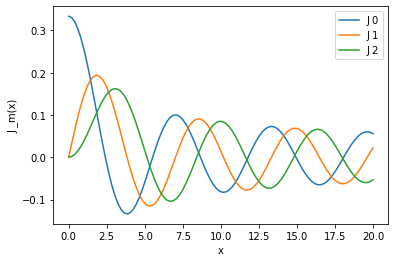

In [14]:
from math import sin,cos,pi
from numpy import linspace,array
from pylab import plot,show,xlabel,ylabel,legend

a = 0.0
b = pi
N = 1000
h = (b-a)/N

def J(m,x):
    oddsum = 0
    for k in range(1,N,2):
        oddsum += cos(m*(a+k*h) - x*sin(a+k*h))
    
    evensum = 0
    for k in range(2,N,2):
        evensum += cos(m*(a+k*h) - x*sin(a+k*h))
    
    return (1/pi)*(1/3)*h*(cos(m*(a) - x*sin(a)) + cos(m*(b) - x*sin(b)) + oddsum + evensum)

bessel0 = []
points = []
for x in linspace(0,20,100):
    points.append(x)
    bessel0.append(J(0,x))

bessel1 = []
for x in linspace(0,20,100):
    bessel1.append(J(1,x))
    
bessel2 = []
for x in linspace(0,20,100):
    bessel2.append(J(2,x))



plot(points,bessel0, label="J 0")
plot(points,bessel1,label="J 1")
plot(points,bessel2,label="J 2")
legend(loc="upper right")
xlabel("x")
ylabel("J _m(x)")
show()
    

In the nest step we will make a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda = 500$ nm, in a square region of the focal plane, using the above formula. The size of $r$ will vary from $0$ to $1$ $\mu m$.

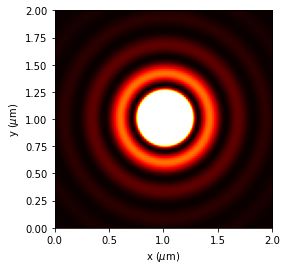

In [25]:
from math import cos,sin,sqrt,pi
from numpy import empty
from pylab import imshow,gray,show,hot,xlabel,ylabel

wavelength = 0.5 # wavelength in um
k = 2*pi/wavelength
side = 2 # side of square in um
points = 100 # number of grid points along each side
spacing = side/points

# Defines center of diffraction pattern 

x1 = side/2
y1 = side/2

# Make empty array to store intensity
xi = empty([points,points],float)

# calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2 + (y-y1)**2)
        if (x-x1)==0 and (y-y1)==0:
            xi[i,j] = 0.5
        else: 
            xi[i,j] = (J(1,k*r1)/(k*r1))**2

# Make the plot
imshow(xi,vmax = 0.0009,origin="lower",extent=[0,side,0,side])
xlabel("x ($\mu$m)")
ylabel("y ($\mu$m)")
hot()
show()